In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# 创建一个32x32的白色图像
n = 16
image = np.ones((2*n, 2*n), np.uint8) * 255

image[:n, :n] = 0
image[n:, n:] = 0

def SimulateSigma(image0, blur_std, noise_std, black, white, n=16, iterNum = 1000):

    image0[:n, :n] = white
    image0[n:, n:] = white
    image0[:n, n:] = black
    image0[n:, :n] = black

    xList = []
    yList = []

    for _ in range(0, iterNum):
        image = cv2.GaussianBlur(image0, (5, 5), blur_std)

        image = image + np.round(np.random.normal(0, noise_std, image0.shape)).astype(int)
        image = np.uint8(image)

        # 转换为灰度图像
        gray = image

        # 使用cv2.goodFeaturesToTrack()检测角点
        corners = cv2.goodFeaturesToTrack(gray, 25, 0.01, 10)

        # 使用cv2.cornerSubPix()对角点进行精确化定位
        criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
        corners2 = cv2.cornerSubPix(gray, corners, (3, 3), (-1, -1), criteria)

        # 输出精确化定位后的角点坐标
        for corner in corners2:
            x, y = corner.ravel()

            # 故障检测
            if abs(x - 15.5) > 0.3 or abs(y - 15.5) > 0.3:
                continue
            
            xList.append(x)
            yList.append(y)
        
    xList = np.asarray(xList)
    yList = np. asarray(yList)
    
    # plt.imshow(image)

    return xList, yList

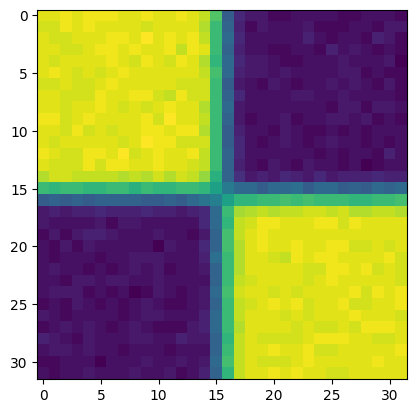

In [6]:
white = 110
black = 70
noise = 0.7
blur = 1
N = 10000

xList, yList = SimulateSigma(image, blur, noise, black, white, iterNum=N)

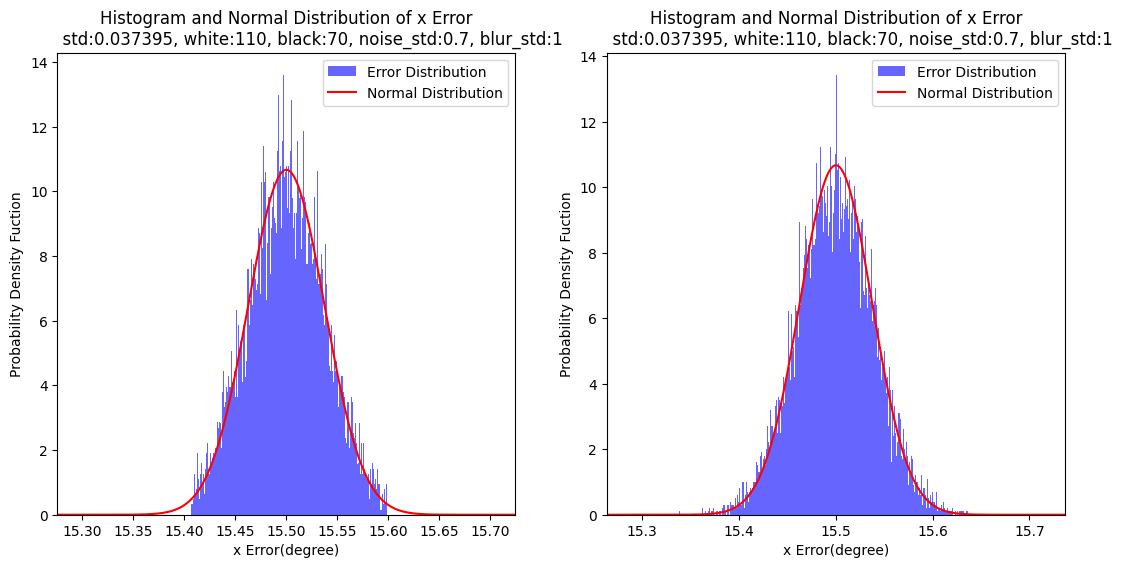

In [10]:
k = int(len(xList) * 0.002)
xList = np.sort(xList)
xList = xList[k:-k]

mean_x = np.mean(xList)
std_x = np.std(xList)

mean_y = np.mean(yList)
std_y = np.std(yList)

d1 = std_x * 6
d2 = std_y * 6

plt.figure(figsize=[13, 6])

# 绘制直方图
plt.subplot(1, 2, 1)
plt.hist(xList, bins=300, density=True, alpha=0.6, color='b', label='Error Distribution')

# 绘制正态分布曲线
x = np.linspace(mean_x - d1, mean_x + d1, 1000)
y = norm.pdf(x, mean_x, std_x)
plt.plot(x, y, 'r', label='Normal Distribution')
plt.xlabel('x Error(degree)')
plt.ylabel('Probability Density Fuction')
plt.title(f'Histogram and Normal Distribution of x Error\n\
          std:{std_x:4f}, white:{white}, black:{black}, noise_std:{noise}, blur_std:{blur}')
plt.xlim(mean_x - d1, mean_x + d1)
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(yList, bins=300, density=True, alpha=0.6, color='b', label='Error Distribution')

# 绘制正态分布曲线
x = np.linspace(mean_y - d2, mean_y + d2, 1000)
y = norm.pdf(x, mean_x, std_x)
plt.plot(x, y, 'r', label='Normal Distribution')
plt.xlabel('x Error(degree)')
plt.ylabel('Probability Density Fuction')
plt.title(f'Histogram and Normal Distribution of x Error\n\
          std:{std_x:4f}, white:{white}, black:{black}, noise_std:{noise}, blur_std:{blur}')
plt.xlim(mean_x - d2, mean_x + d2)
plt.legend()

In [6]:
noiseList = np.arange(0.3, 2, 0.05)
xStdList = []
yStdList = []
for noise in noiseList:
    xList, yList = SimulateSigma(image, blur, noise, black, white, iterNum=4000)
    std_x = np.std(xList)
    xStdList.append(std_x)
    std_y = np.std(yList)
    yStdList.append(std_y)

Text(0, 0.5, 'y error std')

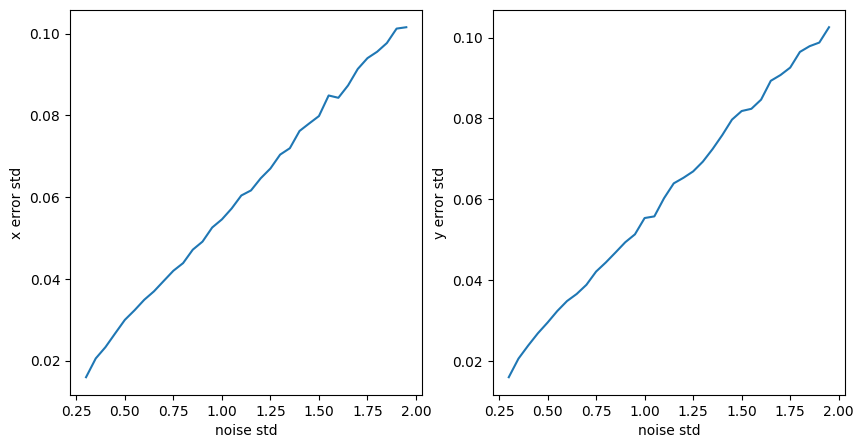

In [8]:
plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
plt.plot(noiseList, xStdList)
plt.xlabel('noise std')
plt.ylabel('x error std')
plt.subplot(1,2,2)
plt.plot(noiseList, yStdList)
plt.xlabel('noise std')
plt.ylabel('y error std')

In [12]:
white = 110
black = 70
noise = 0.7
blur = 1
deltaList = np.arange(40, 110, 5)
xStdList = []
yStdList = []
for delta in deltaList:
    xList, yList = SimulateSigma(image, blur, noise, black, black+delta, iterNum=4000)
    std_x = np.std(xList)
    xStdList.append(std_x)
    std_y = np.std(yList)
    yStdList.append(std_y)

Text(0, 0.5, 'y error std')

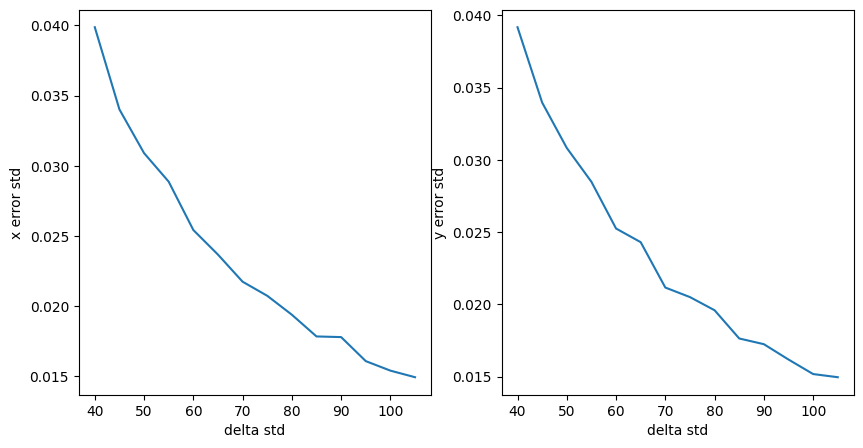

In [13]:
plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
plt.plot(deltaList, xStdList)
plt.xlabel('delta std')
plt.ylabel('x error std')
plt.subplot(1,2,2)
plt.plot(deltaList, yStdList)
plt.xlabel('delta std')
plt.ylabel('y error std')

Text(0, 0.5, 'y error std')

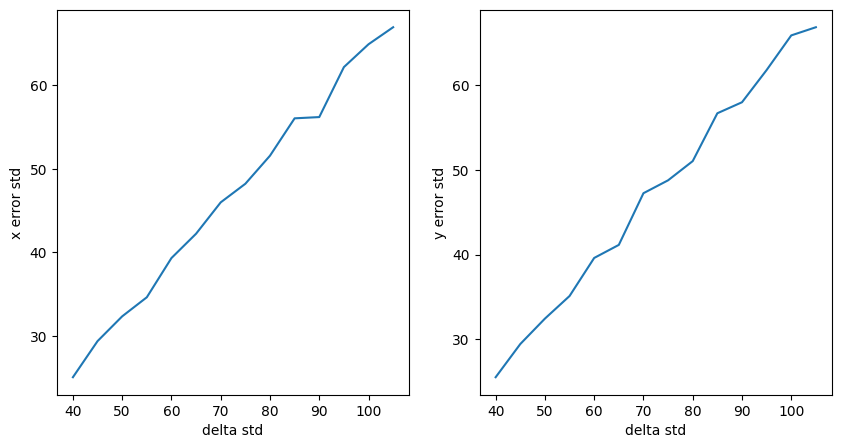

In [15]:
xStdList = np.asarray(xStdList)
yStdList = np.asarray(yStdList)
xStdList_ = 1/xStdList
yStdList_ = 1/yStdList
plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
plt.plot(deltaList, xStdList_)
plt.xlabel('delta std')
plt.ylabel('x error std')
plt.subplot(1,2,2)
plt.plot(deltaList, yStdList_)
plt.xlabel('delta std')
plt.ylabel('y error std')

In [2]:
white = 110
black = 70
noise = 0.7
blur = 1
blurList = np.arange(0.4, 2, 0.1)
xStdList = []
yStdList = []
for blur in blurList:
    xList, yList = SimulateSigma(image, blur, noise, black, white, iterNum=4000)
    std_x = np.std(xList)
    xStdList.append(std_x)
    std_y = np.std(yList)
    yStdList.append(std_y)

In [ ]:
plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
plt.plot(blurList, xStdList)
plt.xlabel('delta std')
plt.ylabel('x error std')
plt.subplot(1,2,2)
plt.plot(blurList, yStdList)
plt.xlabel('delta std')
plt.ylabel('y error std')